# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow tensorflow opencv-python matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.6 kB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/ce/25/a557ee10ac9dce1300850024707ce1850a6958f1673a9194be878b99d631/matplotlib-3.8.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadat

In [3]:
!pip list

Package                      Version
---------------------------- ---------------
absl-py                      2.1.0
anyio                        4.2.0
appnope                      0.1.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
defusedxml                   0.7.1
executing                    2.0.1
fastjsonschema               2.19.1
flatbuffers                  2

In [14]:
import tensorflow as tf
import os

In [15]:
# # Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

In [16]:
# tf.config.list_physical_devices('GPU')

# 2. Remove dodgy images

In [17]:
import cv2
import imghdr

In [18]:
data_dir = 'data' 

In [19]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [20]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

NotADirectoryError: [Errno 20] Not a directory: 'data/.DS_Store'

# 3. Load Data

In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
batch = data_iterator.next()

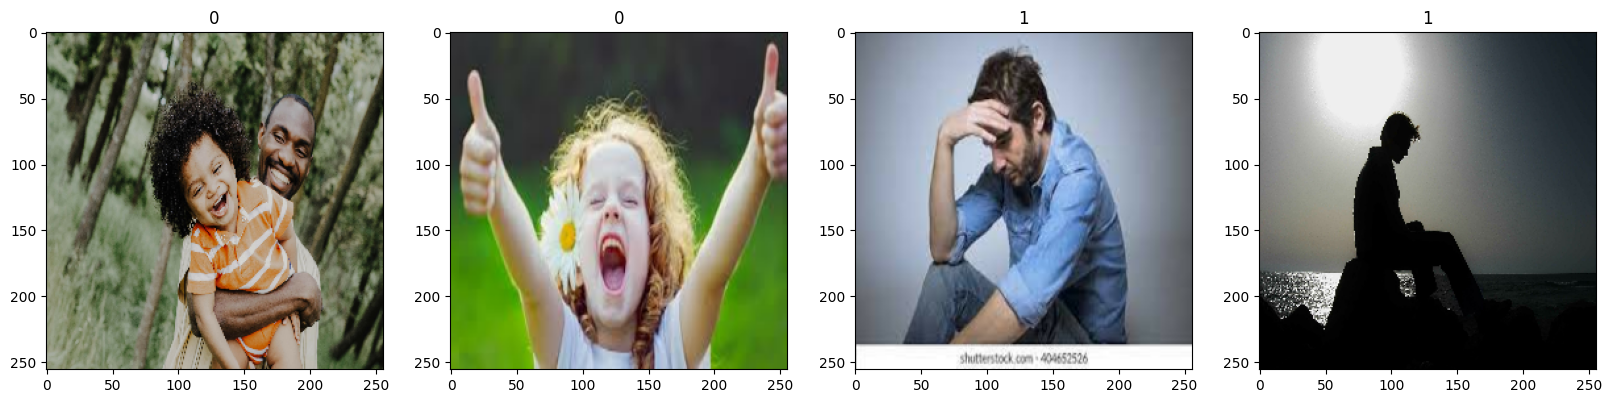

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [26]:
data = data.map(lambda x,y: (x/255, y))

In [27]:
data.as_numpy_iterator().next()

(array([[[[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745]],
 
         ...,
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862

# 5. Split Data

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [29]:
train_size

7

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [31]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [55]:
logdir='logs'

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 5s 536ms/step - loss: 1.1985 - accuracy: 0.5268 - val_loss: 0.7088 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 5s 560ms/step - loss: 0.6752 - accuracy: 0.5446 - val_loss: 0.6015 - val_accuracy: 0.8594
Epoch 3/20
7/7 [==============================] - 6s 591ms/step - loss: 0.5893 - accuracy: 0.7098 - val_loss: 0.5537 - val_accuracy: 0.7969
Epoch 4/20
7/7 [==============================] - 5s 514ms/step - loss: 0.5510 - accuracy: 0.7545 - val_loss: 0.3607 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 5s 511ms/step - loss: 0.4924 - accuracy: 0.7634 - val_loss: 0.3830 - val_accuracy: 0.9219
Epoch 6/20
7/7 [==============================] - 5s 508ms/step - loss: 0.4167 - accuracy: 0.8304 - val_loss: 0.3625 - val_accuracy: 0.7969
Epoch 7/20
7/7 [==============================] - 5s 513ms/step - loss: 0.3305 - accuracy: 0.8705 - val_loss: 0.2444 - val_accuracy: 0.8438
Epoch 8/20
7/7 [====

# 8. Plot Performance

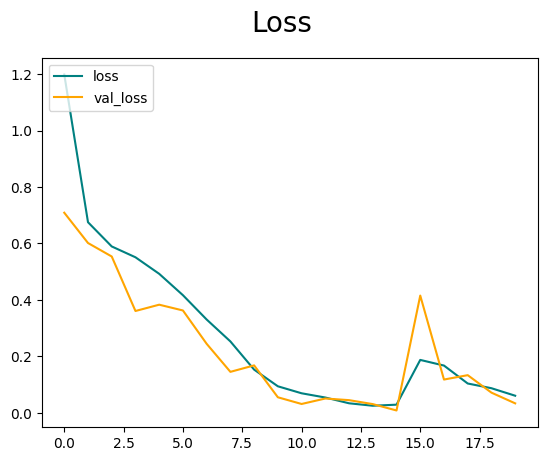

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

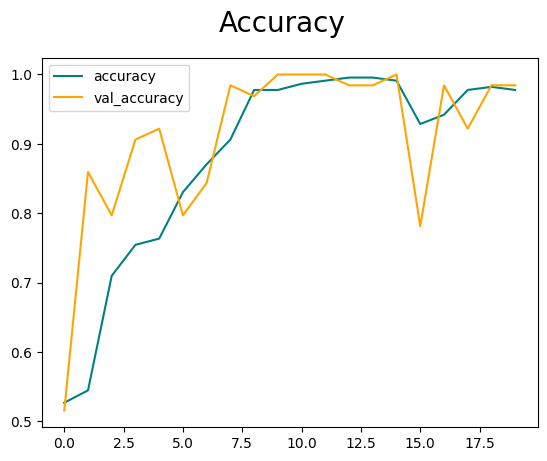

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 86ms/step


In [45]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [57]:
import cv2

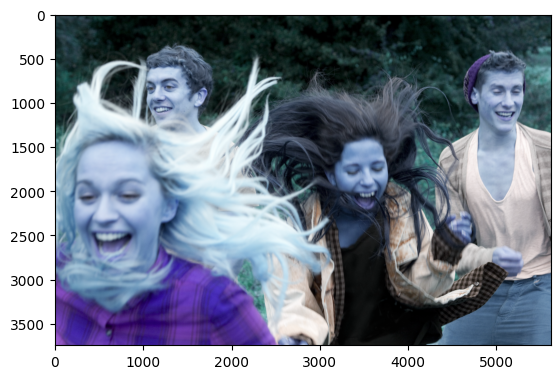

In [58]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

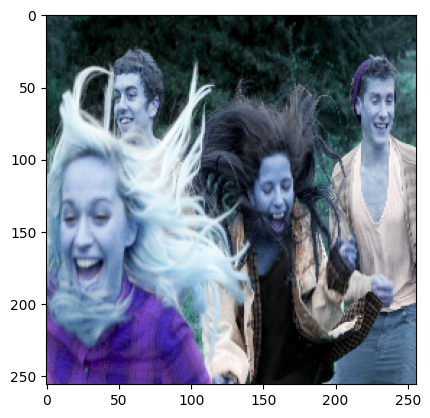

In [59]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [61]:
yhat

array([[0.00080475]], dtype=float32)

In [62]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [63]:
from tensorflow.keras.models import load_model

In [65]:
model.save(os.path.join('models','imageclassifiernew.h5'))

In [71]:
new_model = load_model(os.path.join('models','imageclassifiernew.h5'))

In [72]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 47ms/step


array([[0.00080475]], dtype=float32)